In [3]:
import pandas as pd
import numpy as np

## 문제 1. 데이터셋 불러오기 및 기본 정보 확인

In [5]:
# 1-1) iris(붓꽃) 데이터셋을 불러오고, 데이터프레임으로 변환한 후 첫 5개 행을 출력하시오.
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
irisDF = pd.read_csv(url)
irisDF.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# 1-2) 데이터프레임의 기본 정보를 확인하고, 각 열의 데이터 타입을 제시하시오.
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# 1-3) 붓꽃의 품종에 대한 클래스 분포를 확인하고, 각 클래스별 데이터 개수를 제시하시오.
value_countsDF = irisDF['species'].value_counts()
for idx in value_countsDF.index:
    print(f'{idx:10} 개수 : {value_countsDF.loc[idx]}')

setosa     개수 : 50
versicolor 개수 : 50
virginica  개수 : 50


# 문제 2. 데이터 시각화 및 탐색

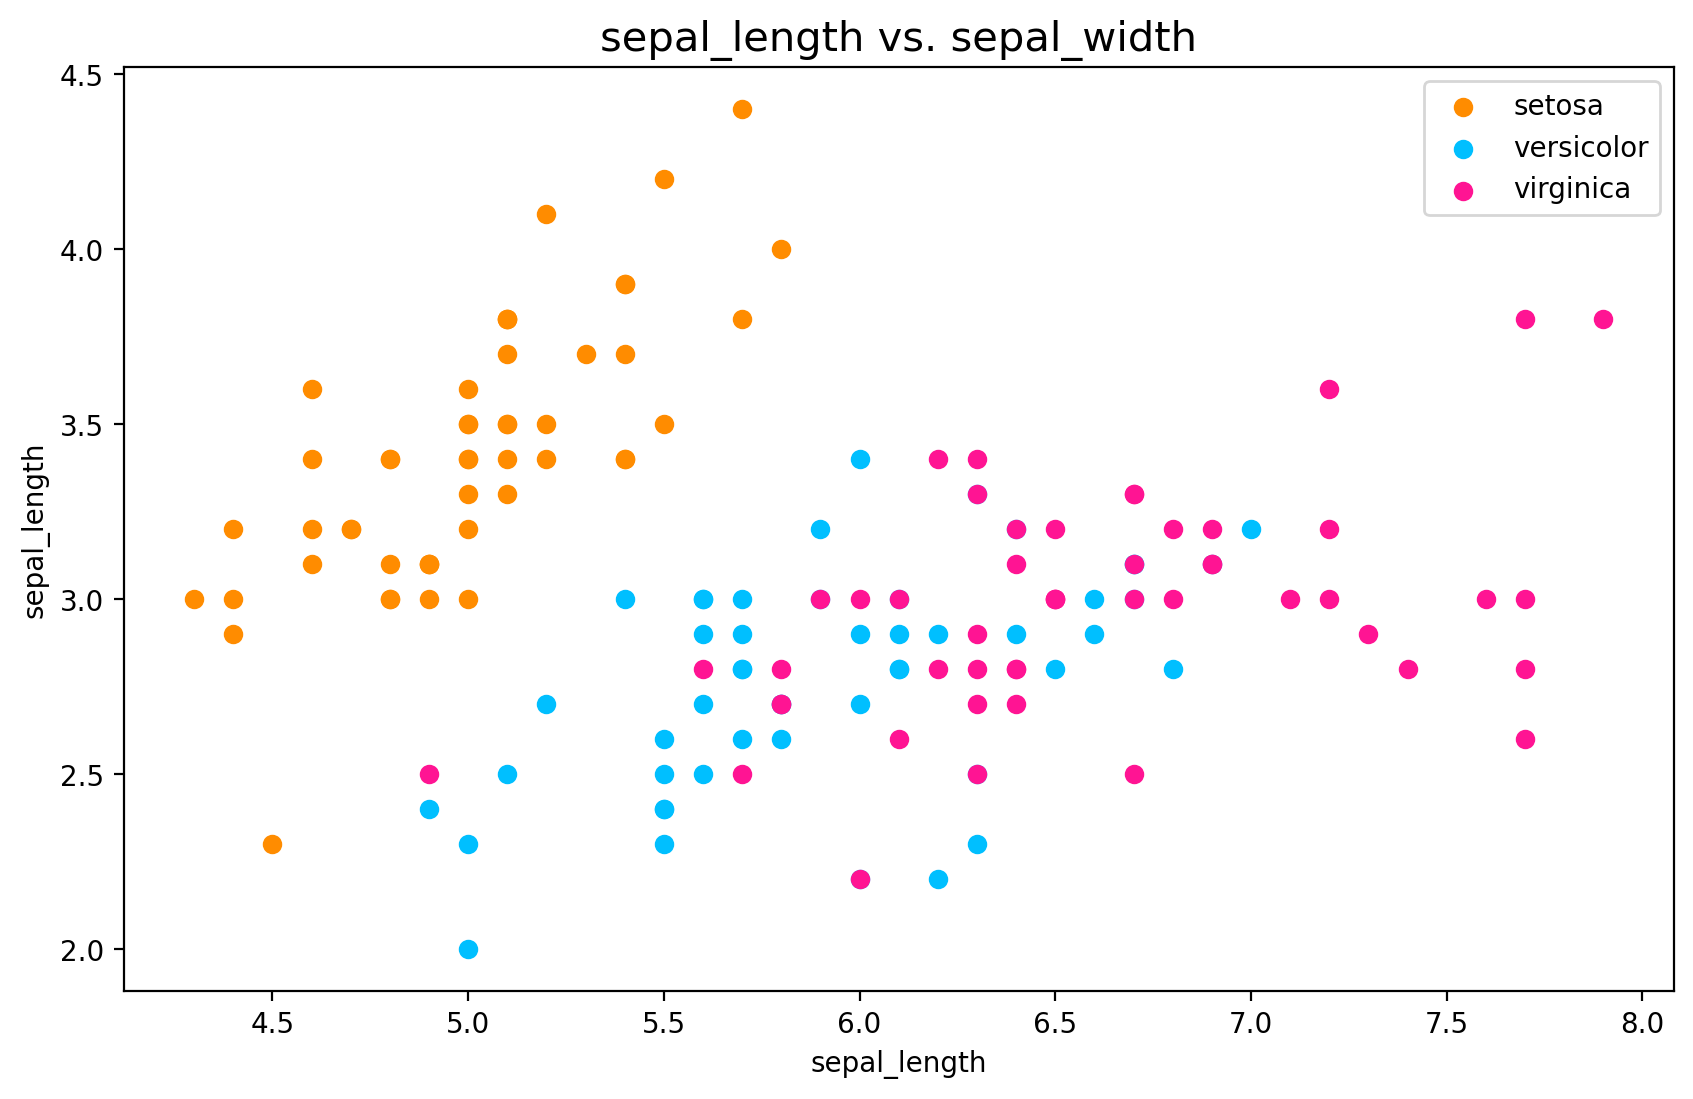

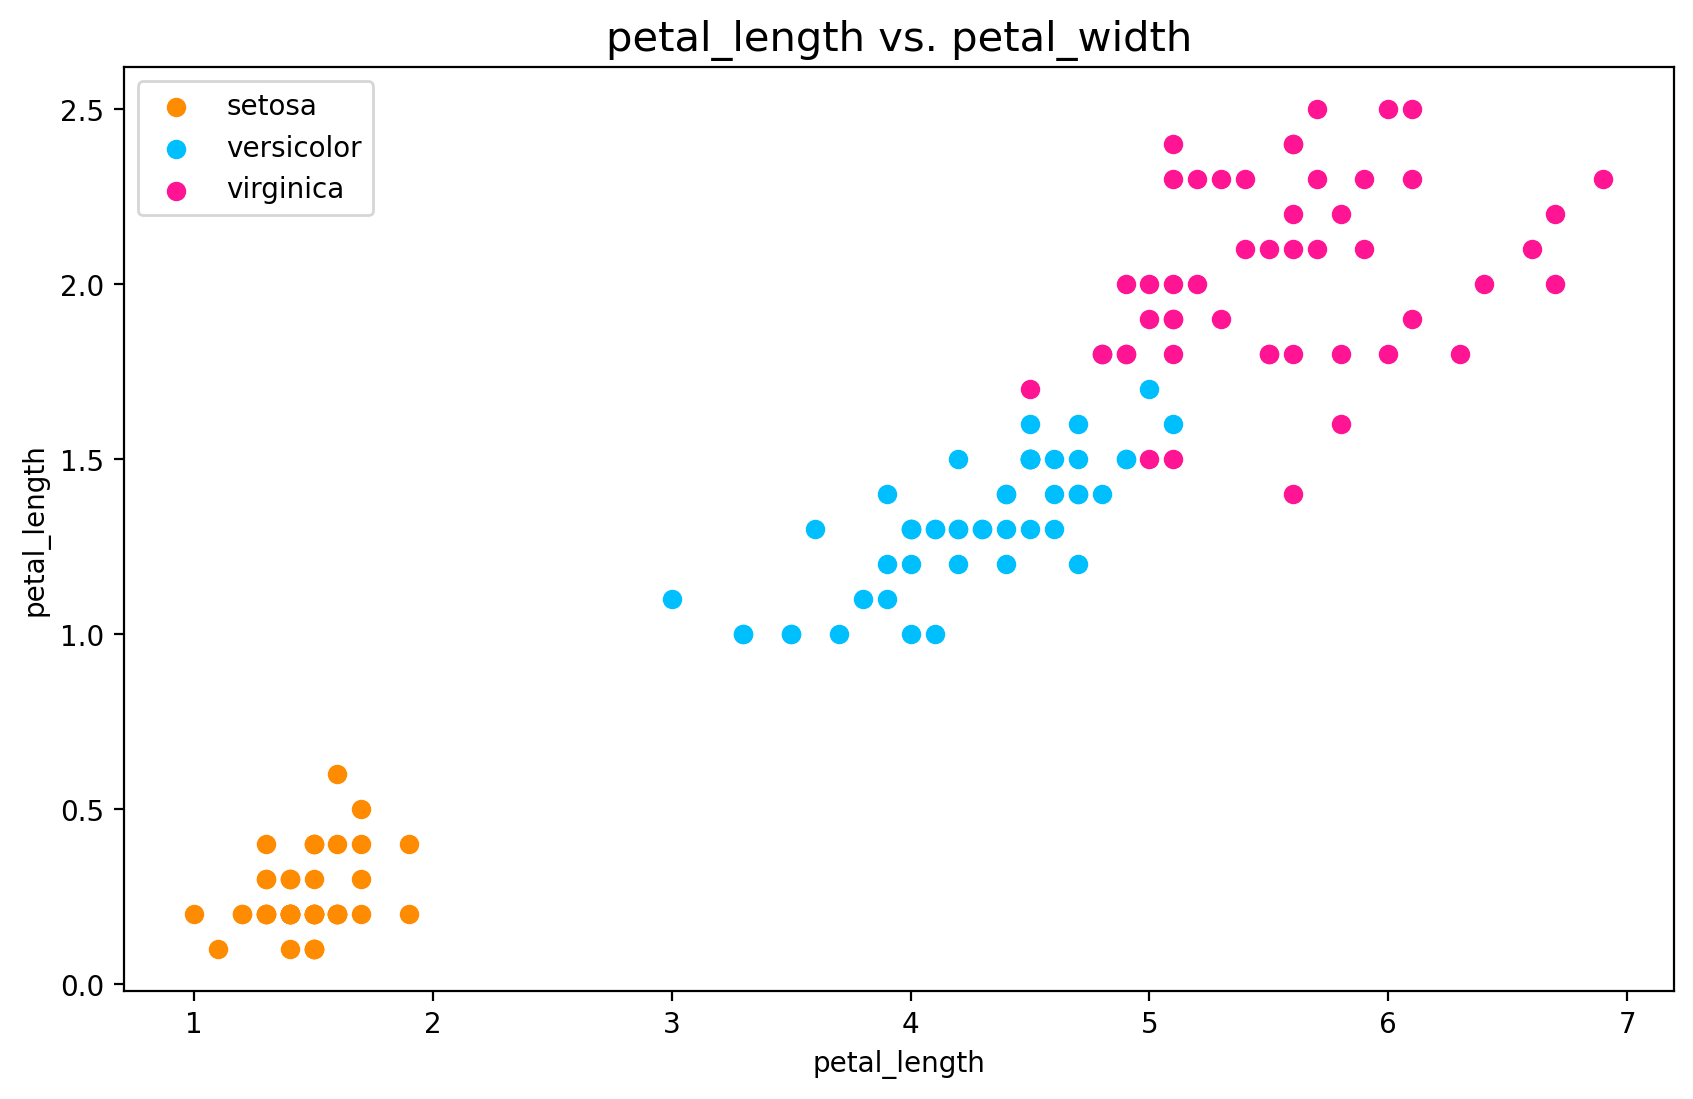

In [72]:
# 2-1) 붓꽃 데이터셋에서 각 특성 간의 산점도(scatter plot)를 그리되, 각 클래스별로 다른 색상을 사용하여 시각화하시오.
import matplotlib.pyplot as plt

def iris_visualize(col1, col2, title=0):
    species = irisDF['species'].unique()
    
    fig = plt.figure(figsize=(10, 6), dpi=200)
    ax = fig.add_subplot(111)
    colors = ['darkorange', 'deepskyblue', 'deeppink']
    # 산점도를 여러 개 겹치는 방법 : plt.scatter 를 plt.show 이전에 여러 번 작성하는 것
    for i, sp in enumerate(species):
        species_condition = irisDF['species'] == sp
        ax.scatter(irisDF[species_condition][col1], 
                   irisDF[species_condition][col2], color=colors[i], label=sp)
    
    ax.set_title(title if title != 0 else f'{col1} vs. {col2}', fontsize=15)
    ax.set_xlabel(col1)
    ax.set_ylabel(col1)
    ax.legend()
    
    plt.show()

iris_visualize('sepal_length', 'sepal_width')
iris_visualize('petal_length', 'petal_width')

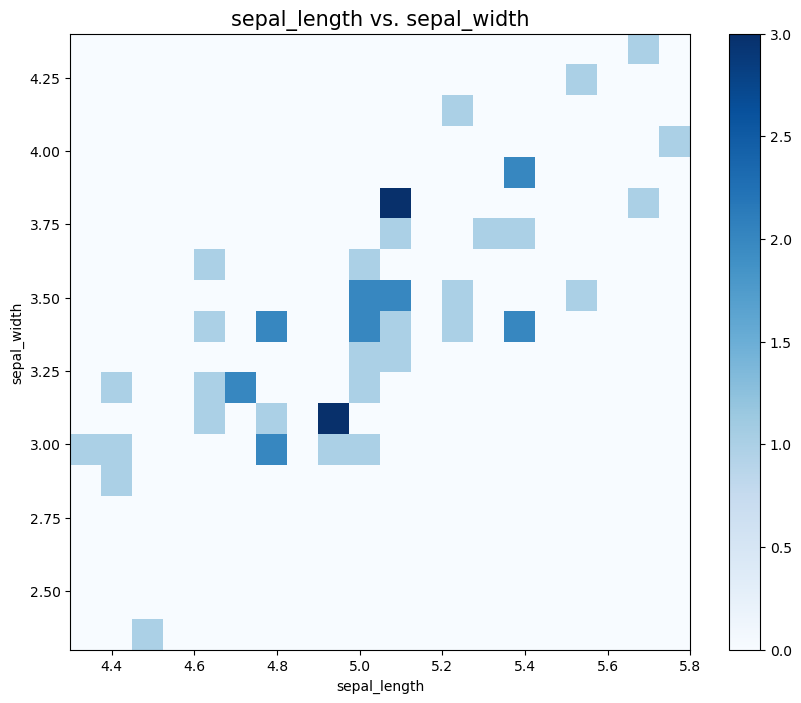

In [62]:
# 2-2) 꽃받침의 길이(sepal_length) 와 꽃받침의 너비(sepal_width)의 관계를 시각화하고, 각 클래스별로 구분하여 출력하시오.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

species_condition = irisDF['species'] == 'setosa'
c = ax.hist2d(irisDF[species_condition]['sepal_length'], irisDF[species_condition]['sepal_width'], bins=(20,20), cmap='Blues')
fig.colorbar(c[3])  # c[3] : <class 'matplotlib.collections.QuadMesh'>
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_title('sepal_length vs. sepal_width', fontsize=15)
plt.show()

# 문제 3. 연속확률변수 및 연속확률분포 계산

In [67]:
# 3-1) 꽃잎의 길이(petal_length)를 연속확률변수로 가정할 때, 이 확률변수의 평균과 분산을 계산하시오.
petal_length_mean = irisDF['petal_length'].mean()
petal_length_var = irisDF['petal_length'].var()

print('꽃잎의 길이(petal_length)의 평균과 분산')
print('-'*50)
print(f'[평균] : {petal_length_mean}')
print(f'[분산] : {petal_length_var}')

꽃잎의 길이(petal_length)의 평균과 분산
--------------------------------------------------
[평균] : 3.758666666666666
[분산] : 3.1131794183445156


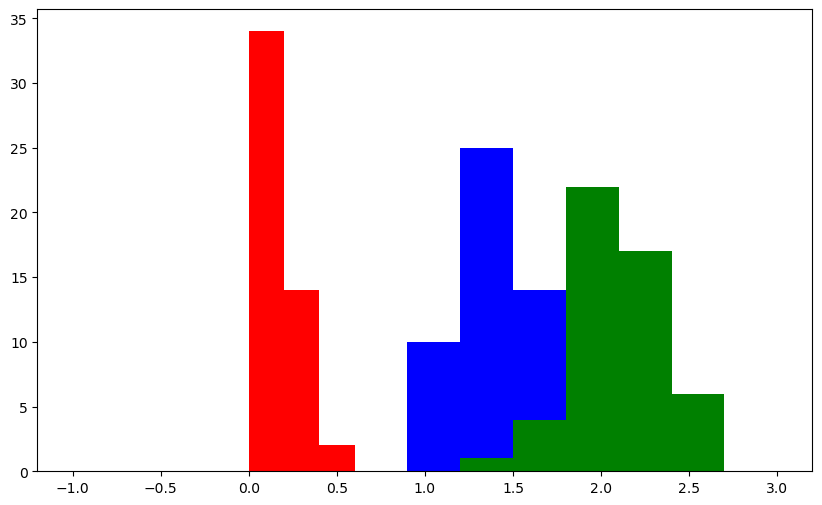

In [97]:
# 3-2) 꽃잎의 너비(petal_width)를 연속확률변수로 가정할 때, 이 확률변수의 확률밀도함수를 계산하고 그래프로 시각화하시오.
# from scipy improt integrate (?)
# from scipy.stats import norm (?)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

species_condition = irisDF['species'] == 'setosa'
ax.hist(irisDF[species_condition]['petal_width'], bins=10, range=(-1, 1), color='red')
species_condition = irisDF['species'] == 'versicolor'
ax.hist(irisDF[species_condition]['petal_width'], bins=10, range=(0, 3), color='blue')
species_condition = irisDF['species'] == 'virginica'
ax.hist(irisDF[species_condition]['petal_width'], bins=10, range=(0, 3), color='green')
plt.show()

In [86]:
# 3-3) 꽃잎의 길이(petal_length)가 4cm 이상 5cm 미만일 확률을 계산하시오.
four_somthing = (4 <= irisDF['petal_length']) & (irisDF['petal_length'] < 5)
four_somthing_prob = four_somthing.sum() / len(four_somthing)

print(f'꽃잎의 길이가 4이상 5미만일 확률 : {four_somthing_prob*100:.1f}%')

꽃잎의 길이가 4이상 5미만일 확률 : 28.7%
